## **Imports**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

## **Understanding the ElasticNet**

Elastic Net is a popular type of linear regression that combines two other common techniques: Lasso and Ridge regression. It's especially useful when dealing with datasets that have many features, some of which might be related to each other.

**Why use Elastic Net?**

*   **Handles multicollinearity:** When features are highly correlated, Elastic Net can help stabilize the model and prevent coefficients from becoming too large.
*   **Feature selection:** Like Lasso, Elastic Net can shrink some coefficients to zero, effectively performing feature selection by ignoring less important features.
*   **Balances L1 and L2 regularization:** It gets the benefits of both Lasso (feature selection) and Ridge (handling multicollinearity and reducing coefficient size).

**What is its mechanism?**

Elastic Net works by adding a penalty to the standard linear regression cost function. This penalty is a combination of the L1 penalty (from Lasso) and the L2 penalty (from Ridge).

*   **L1 penalty (Lasso):** Sum of the absolute values of the coefficients. This encourages sparsity, meaning some coefficients become exactly zero.
*   **L2 penalty (Ridge):** Sum of the squared values of the coefficients. This shrinks coefficients towards zero but rarely makes them exactly zero.

The balance between the L1 and L2 penalties is controlled by a parameter called `l1_ratio`. A value of 0 means only L2 regularization (Ridge), a value of 1 means only L1 regularization (Lasso), and a value between 0 and 1 means a combination of both. Another parameter, `alpha`, controls the overall strength of the regularization.

**When to use Elastic Net?**

Elastic Net is a good choice when you have:

*   A large number of features.
*   Features that are correlated with each other.
*   You want to perform feature selection and regularization simultaneously.

It's often used in fields like genomics, finance, and image processing where datasets can be high-dimensional and complex.

## **Generating & Exploring Dataset**

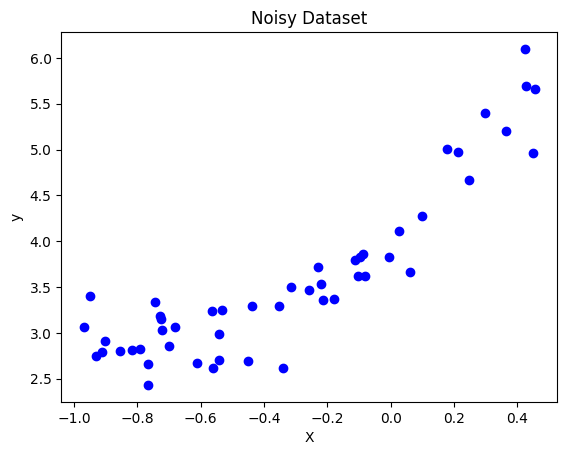

In [ ]:
# Reproducibility
np.random.seed(42)

# Generate simple dataset (nonlinear relation)
X = 1.5 * np.random.rand(50, 1) - 1   # values between -1 and 1
y = 4 + 3 * X.flatten() + 2 * X.flatten()**2 + np.random.randn(50) * 0.3

plt.scatter(X, y, color='blue')
plt.title("Noisy Dataset")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

## **Data Preprocessing**

In [ ]:
# Reshaping the Target Column
y = y.reshape(-1, 1)

# Applying Poynomial Feature on the Dataset
poly = PolynomialFeatures(degree=5, include_bias=False)
X_poly = poly.fit_transform(X)

# SCaling the Dataset
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

## **Custom Implmentation of ElasticNet**

In [ ]:
class ElasticNetRegression:

  # Initialize the ElasticNetRegression model with hyperparameters
  def __init__(self, alpha=1.0, l1_ratio=0.5, learning_rate=0.01, n_iterations=1000):
    # Regularization strength (combines L1 and L2)
    self.alpha = alpha
    # balance between L1 and L2 (0 for L2, 1 for L1)
    self.l1_ratio = l1_ratio
    # Step size for gradient descent
    self.learning_rate = learning_rate
    # Number of iterations for gradient descent
    self.n_iterations = n_iterations
    # Model parameters (weights and bias)
    self.theta = None

  # Fit the model to the training data
  def fit(self, X, y):
    # Storing no of samples(instances) and features
    m, n = X.shape

    # Add a column of ones to X for the bias(intercept) term
    X_b = np.c_[np.ones((m, 1)), X]

    # Reshape y to be a column vector
    y = y.reshape(-1, 1)

    # Initialize model parameters (theta) to zeros
    self.theta = np.zeros((n+1, 1))

    # Gradient descent loop
    for i in range(self.n_iterations):
      # Calculate predicted values
      y_pred = X_b.dot(self.theta)

      # Calculate the error
      error = y_pred - y

      # Calculate the gradient of the Mean Squared Error (MSE)
      mse_grad = (1/m) * X_b.T.dot(error)

      # Calculate the gradient of the L1 regularization term
      l1_grad = (self.alpha * self.l1_ratio / m) * np.sign(self.theta)

      # Calculate the gradient of the L2 regularization term
      l2_grad = (self.alpha * (1 - self.l1_ratio) / m) * self.theta

      # Set the gradients for the bias term to zero (bias is not regularized)
      l1_grad[0] = 0
      l2_grad[0] = 0

      # Calculate the total gradient (MSE gradient + L1 gradient + L2 gradient)
      total_grad = mse_grad + l1_grad + l2_grad

      # Update the model parameters using the learning rate and total gradient
      self.theta -= self.learning_rate * total_grad

  # Make predictions using the trained model
  def predict(self, X):
    m = X.shape[0] # Number of samples

    # Add a column of ones to X for the bias term
    X_b = np.c_[np.ones((m, 1)), X]

    # Calculate predictions
    return X_b.dot(self.theta)

In [ ]:
# Creating instance of our ElasticNet Regression
elastic_scratch = ElasticNetRegression(alpha=0.1, l1_ratio=0.5, learning_rate=0.01, n_iterations=5000)
# Fit(Training) the model
elastic_scratch.fit(X_poly_scaled, y)
# Predict
y_pred_scratch = elastic_scratch.predict(X_poly_scaled)

# Evaluate
print("Scratch Elastic Net:")
print("MSE:", mean_squared_error(y, y_pred_scratch))
print("R²:", r2_score(y, y_pred_scratch))

Scratch Elastic Net:
MSE: 0.07430969360496753
R²: 0.9109375940010783


## **Sklearn's ElasticNet Regression**

In [ ]:
# Usinf sklearn's model
elastic_sklearn = ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=5000)
# Fit(Training)
elastic_sklearn.fit(X_poly_scaled, y)
# Predict
y_pred_sklearn = elastic_sklearn.predict(X_poly_scaled)

# Evaluate
print("\nScikit-Learn Elastic Net:")
print("MSE:", mean_squared_error(y, y_pred_sklearn))
print("R²:", r2_score(y, y_pred_sklearn))


Scikit-Learn Elastic Net:
MSE: 0.13166800614113178
R²: 0.8421919287899462


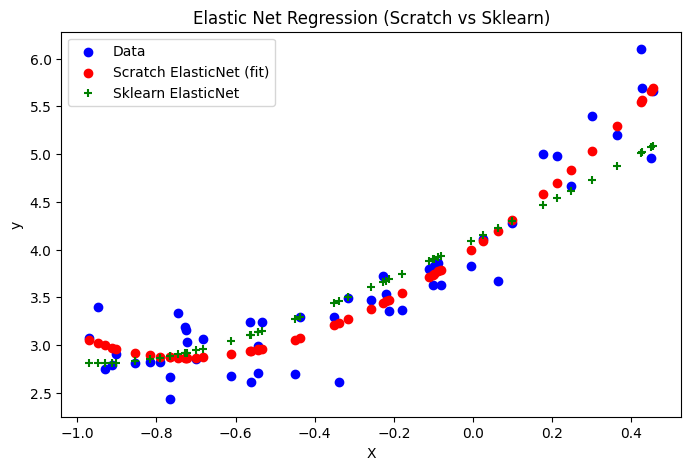

In [ ]:
# Plotting the results of Custom & Scikit
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color="blue", label="Data")
plt.scatter(X, y_pred_scratch, color="red", label="Scratch ElasticNet (fit)")
plt.scatter(X, y_pred_sklearn, color="green", marker="+", label="Sklearn ElasticNet")
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title("Elastic Net Regression (Scratch vs Sklearn)")
plt.show()

## **Comparision Between the Models**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

In [ ]:
np.random.seed(42)

# Generate a large nonlinear dataset
X = 6 * np.random.rand(200, 1) - 3   # range [-3, 3]
y = 0.5 * X.flatten()**5 - 3 * X.flatten()**3 + 2 * X.flatten()**2 + np.random.randn(200) * 20
y = y.reshape(-1, 1)

# Polynomial features (degree 10 to make it very high dimensional → prone to overfitting)
poly = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly.fit_transform(X)

# Standardize features (important for Ridge/Lasso/ElasticNet)
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

In [ ]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=10),
    "Lasso Regression": Lasso(alpha=0.01, max_iter=10000),
    "Elastic Net": ElasticNet(alpha=0.01, l1_ratio=0.5, max_iter=10000)
}

# Fit & predict
predictions = {}
for name, model in models.items():
    model.fit(X_poly_scaled, y)
    predictions[name] = model.predict(X_poly_scaled)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.516e+01, tolerance: 9.120e+00
  model = cd_fast.enet_coordinate_descent(


In [ ]:
results = []
for name, y_pred in predictions.items():
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    results.append([name, mse, r2])

df_results = pd.DataFrame(results, columns=["Model", "MSE", "R²"])
print(df_results)

               Model         MSE        R²
0  Linear Regression  357.362742  0.216274
1   Ridge Regression  370.440411  0.187593
2   Lasso Regression  361.211039  0.207834
3        Elastic Net  365.885501  0.197583


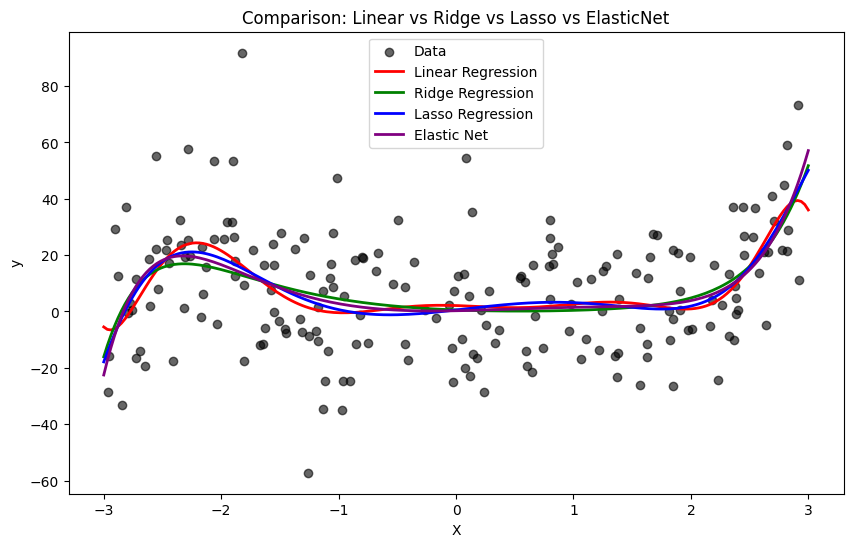

In [ ]:
# Sort X for smooth curve
X_test = np.linspace(-3, 3, 200).reshape(-1, 1)
X_test_poly = poly.transform(X_test)
X_test_poly_scaled = scaler.transform(X_test_poly)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color="black", alpha=0.6, label="Data")

colors = ["red", "green", "blue", "purple"]
for (name, model), c in zip(models.items(), colors):
    y_test_pred = model.predict(X_test_poly_scaled)
    plt.plot(X_test, y_test_pred, color=c, label=name, linewidth=2)

plt.xlabel("X")
plt.ylabel("y")
plt.title("Comparison: Linear vs Ridge vs Lasso vs ElasticNet")
plt.legend()
plt.show()